In [53]:
import ast 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datasets import load_dataset
#loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
#print("All imports successful!")

#Data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x) # to change skill list into data type

In [54]:
df[['job_title_short', 'job_skills']].head(5)

,job_title_short,job_skills
0,Senior Data Engineer,None
1,Data Analyst,"[r, python, sql, nosql, power bi, tableau]"
2,Data Engineer,"[python, sql, c#, azure, airflow, dax, docker,..."
3,Data Engineer,"[python, c++, java, matlab, aws, tensorflow, k..."
4,Data Engineer,"[bash, python, oracle, aws, ansible, puppet, j..."


In [55]:
df_explode= df.explode('job_skills')

In [56]:
#df_explode['job_skills'].value_counts().head(10).plot(kind='bar')

In [57]:
skills_count = df_explode.groupby(['job_title_short','job_skills']).size()

In [58]:
type(skills_count)

pandas.core.series.Series

In [59]:
df_skills_count = skills_count.reset_index(name='skill_count') #change series into dataFrame
df_skills_count = df_skills_count.sort_values(by='skill_count', ascending=False)



In [60]:
df_skills_count

,job_title_short,job_skills,skill_count
1066,Data Scientist,python,113711
865,Data Engineer,sql,113130
830,Data Engineer,python,108022
625,Data Analyst,sql,92428
1101,Data Scientist,sql,78982
...,...,...,...
266,Cloud Engineer,delphi,1
1920,Senior Data Scientist,objective-c,1
1400,Senior Data Analyst,couchdb,1
298,Cloud Engineer,haskell,1


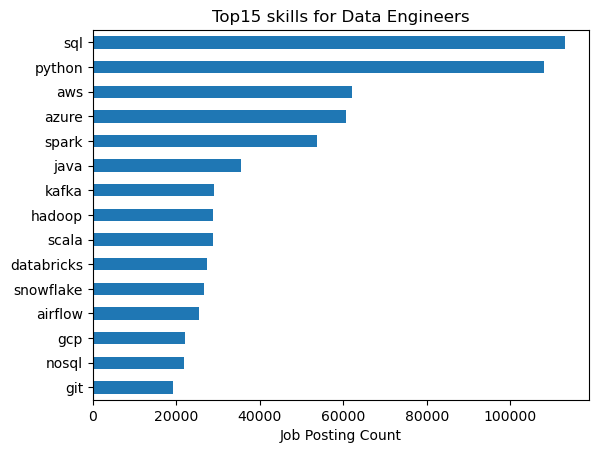

In [69]:
job_title = 'Data Engineer'
top_skills = 15

df_skill_final = df_skills_count[df_skills_count['job_title_short'] == job_title].head(top_skills)
df_skill_final.plot(kind='barh', x='job_skills', y='skill_count')
plt.gca().invert_yaxis()
plt.title(f'Top{top_skills} skills for {job_title}s')
plt.xlabel('Job Posting Count')
plt.ylabel('')
plt.legend().set_visible(False)
plt.show()


In [62]:
df_skill_final

,job_title_short,job_skills,skill_count
625,Data Analyst,sql,92428
494,Data Analyst,excel,66860
590,Data Analyst,python,57190
638,Data Analyst,tableau,46455
583,Data Analyst,power bi,39380
594,Data Analyst,r,29996
606,Data Analyst,sas,27998
585,Data Analyst,powerpoint,13822
664,Data Analyst,word,13562
605,Data Analyst,sap,11280
